# Introdução

No início do terceiro triênio da estratégia em rede <strong data-cite="feldhaus2012gestao">(Calegari, 2012)</strong> idealizada por Diego Calegari, Presidente Executivo da Brasil Júnior em 2009, era chegada a hora de direcionar o Movimento Empresa Júnior para trazer impacto à sociedade.

Depois de um primeiro triênio cujo maior desafio foi estabelecer o conceito de Empresa Júnior como se entendem hoje e um segundo triênio dedicado a melhorar os processos de gestão das EJs, Ianna Brandão, Diretora de Desenvolvimento da Rede em 2016, deu início ao mote "Mais e Melhores Projetos". As estratégias e os conceitos trazidos por ela, como uma definição única de "projeto" e uma plataforma integrada para auditoria, isto é, o Portal BJ, foram responsáveis por gerar em pouco mais de 2 anos tanto resultado quanto se havia gerado nos 27 anos anteriores do Movimento.

A nova riqueza e complexidade que abarcou o Movimento fez as estratégias de suporte da Brasil Júnior e das Federações se tornarem obsoletas. Como prestariam o tão necessário direcionamento que as EJs precisavam num contexto tão diverso? Este foi o problema motivador da criação do Sistema de Clusters em 2017 <strong data-cite="clusters2017">(Leite, 2017)</strong> que trouxe como solução a separação das EJs em grupos, ou *clusters*, de acordo com as dores que estas comumente sentem ao longo dos seus estágios de amadurecimento.

Em 2019, após a recriação da estratégia compartilhada da rede através do projeto "Futuro do MEJ", tornou-se necessário reconstruir os fundamentos da clusterização. Este processo culminou no atual entendimento do conceito de cluster e das dores associadas a cada um deles que podem ser verificadas através [deste link](bit.ly/CLUSTERS) <strong data-cite="clusters2019">(Bezerra, 2019)</strong>.

Este documento visa a análise dos dados gerados a partir do formulário de diagnóstico das Empresas Juniores inscritas no Programa de Suporte da SERJÚNIOR em 2020 que toma por base a clusterização.

# Análise

## Considerações Iniciais

Todos os arquivos utilizados, bem como a versão editável deste documento podem ser encontrados [neste repositório](https://github.com/gustavomello9600/clusters)

Ao leitor não técnico, recomenda-se que se leia de forma superficial as etapas de Tratamento e Modelagem e que se dê especial ênfase à etapa de Discussão. Nas seções de código, é suficiente ler apenas as linhas que se iniciam com "#".

Ao longo do texto, buscou-se esclarecer em linguagem simples e natural, até onde foi possível, o significado dos conceitos abordados e do código empregado; além de se levar em conta os procedimentos necessários para garantir a reprodutibilidade da análise.

Todas as ferramentas de análise utilizadas são provenientes de bibliotecas gratuitas das linguagens de programação R e Python.

## Tratamento

As linhas de código abaixo servem para garantir que, em qualquer sistema operacional, os dados serão encontrados.

In [1]:
#Traz as ferramentas que o Python precisa para se mover dentre
#as pastas do sistema operacional em que está sendo executado
import os

#Ensina o Python a encontrar os dados do diagnóstico
caminho_para_os_dados =  os.path.join("dados",
                                      "clusters.csv")

#Carrega a integração entre as linguagens R e Python
%load_ext rpy2.ipython

In [2]:
%%R -i caminho_para_os_dados
#Chama a linguagem R e fornece o caminho para os dados do diagnóstico

#Carrega as ferramentas de análise
library(tidyr)
library(dplyr)

#Lê os dados e os formata para a análise
entrada <- read.csv(caminho_para_os_dados)
entrada <- as_tibble(entrada)

#Processa e organiza os dados carregados 
processada <- entrada %>%
                  pivot_longer(
                       cols = -EJs,
                       names_to = c("Eixo", "Cluster", "Dores"),
                       names_pattern = "([A-Z]+)_([1-5])_([1-5])",
                       values_to = "Resposta")
    
#Agrupa os dados por EJ, Cluster e Eixo e calcula a média das
#respostas para cada um desses grupos
empresas_juniores <- processada %>%
                         group_by(EJs, Cluster, Eixo) %>%
                         summarise(Media=mean(Resposta))

#Gera uma base de dados para cada Eixo
ejs_por_MN <- empresas_juniores %>% filter(Eixo == "MN")
ejs_por_VM <- empresas_juniores %>% filter(Eixo == "VM")
ejs_por_TC <- empresas_juniores %>% filter(Eixo == "TC")
ejs_por_GO <- empresas_juniores %>% filter(Eixo == "GO")


#Agrupa os dados por EJ e Cluster e calcula a
#média das respostas para cada um desses grupos
ejs_por_cluster <- empresas_juniores %>%
                       group_by(EJs, Cluster) %>%
                       summarise(Media=mean(Media))
        
#Agrupa os dados por Cluster, Eixo e Dores,
#calcula a média para cada grupo e organiza a tabela
#de modo que as dores mais presentes fiquem no topo
dores <- processada %>%
             group_by(Cluster, Eixo, Dores) %>%
             summarise(Media=mean(Resposta)) %>%
             arrange(desc(Media))

#Mostra as primeiras linhas da tabela gerada acima
print(head(dores))

#Sumariza as dores por eixo
eixos <- dores %>%
             group_by(Eixo) %>%
             summarize(Media=mean(Media)) %>%
             arrange(desc(Media))

#Mostra o sumário por eixo
eixos

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




`summarise()` regrouping output by 'EJs', 'Cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'EJs' (override with `.groups` argument)
`summarise()` regrouping output by 'Cluster', 'Eixo' (override with `.groups` argument)
# A tibble: 6 x 4
# Groups:   Cluster, Eixo [5]
  Cluster Eixo  Dores Media
  <chr>   <chr> <chr> <dbl>
1 5       VM    2      3   
2 5       VM    1      2.67
3 2       TC    1      2.58
4 3       TC    2      2.58
5 1       TC    1      2.5 
6 4       VM    1      2.5 
`summarise()` ungrouping output (override with `.groups` argument)
# A tibble: 4 x 2
  Eixo  Media
  <chr> <dbl>
1 VM     2.17
2 TC     1.94
3 MN     1.73
4 GO     1.69


O que a primeira tabela nos diz em sua primeira linha, por exemplo, é que a dor mais latente das EJs inscritas no programa de suporte, de acordo com suas respostas ao formulário de diagnóstico, é a 2ª dor do eixo de Vendas & Mercado no Cluster 5. Consultando o documento, vemos que esta corresponde a:

> Temos dificuldade de encontrar nichos de mercados alternativos para serem explorados e posicionar nossa marca em canais que os atinjam.

As demais dores, em ordem de colocação, são:

> Não realizamos investimentos em estruturas que tornem nosso processo de vendas mais inteligente e automatizado.

> O engajamento dos nossos membros é muito desproporcional, o que gera picos de produtividade e inconstância de resultados.

> Nossos membros são pouco proativos em empreenderem mudanças importantes para a nossa EJ.

> Temos dificuldade em atrair membros para a EJ.

> Não temos uma inteligência de vendas para tornar a prospecção de novos negócios e vendas mais eficiente.

Já a segunda tabela mostra que a maioria das dores estão concentradas nos eixos de **Vendas & Mercado** e **Time & Cultura**.

## Modelagem

### Análise de Componentes Principais

Esta técnica consiste em encontrar os padrões de variação mais comuns em um grupo de dados. Para os fins desta análise, considera-se que o padrão de identificação geral de uma EJ com as dores de cada cluster pode ser representada como um sinal, isto é, como na imagem abaixo:

![EJs](output_9_1.png)

A EJ hipotética acima representada em azul tem um "Sinal de Cluster" mais forte no 1 e no 4. Na prática, isto significa que a maior parte das suas dores estão no cluster 1, uma menor parte no 4 e nenhuma nas demais. Repare que as EJs em verde e vermelho representadas por traços pontilhados tem perfis próximos. 

É notável ao olho humano que o sinal verde é mais próximo ao azul do que o vermelho o é. A Análise de Componentes Principais, ou PCA, como comumente é referida, enxerga, no entanto, os dois sinais como distantes do azul na mesma medida. Para contornar este problema, basta "espalhar" um pouco o sinal de cada EJ. Isto pode ser feito através de uma operação conhecida na Álgebra Linear como "mudança de base". O resultado de um sinal puro e unitário de cluster 1 ao ser "espalhado" é o que pode ser visto na figura abaixo:

![Sinal Espalhado](output_8_1.png)

O sinal azul é o original e o sinal amarelo é a sua versão distribuída. Distribuí-lo ajuda a conferir um peso maior para sua relação com cada cluster adjacente, isto é, ensina o método que uma EJ de cluster 4 é mais próxima de uma EJ de cluster 5 do que de uma EJ de cluster 1.

Cada sinal pode ser então entendido como um vetor de 5 dimensões, cada dimensão representando a força do sinal em cada cluster. A utilidade de interpretar os dados como sinais é que sinais, quando representados por vetores, conseguem tangibilizar a noção de distância ou diferença na forma de cálculos matemáticos.

As próximas linhas de código tem por objetivo ensinar o Python a trabalhar com sinais de cluster:

In [3]:
#Traz uma ferramenta de cálculo numérico para o Python
import numpy as np

#Permite que o Python consiga verificar se uma dada
#variável é ou não um número
from numbers import Number

#Ensina o Python a inverter matrizes
from numpy.linalg import inv as inversa


#Dá forma ao conceito de Sinal de Cluster dentro do Pythom
class Sinal_de_Cluster:
    
    #Introduz a base canônica, isto é, aquela onde os sinais
    #estão em sua forma original ou não espalhada
    bases = {"c": ((1, 0, 0, 0, 0),
                   (0, 1, 0, 0, 0),
                   (0, 0, 1, 0, 0),
                   (0, 0, 0, 1, 0),
                   (0, 0, 0, 0, 1))
             }
    
    #Ensina o Python a definir uma nova base
    @classmethod
    def definir_base(cls, símbolo, matriz, normal=True):
        if not normal:
            cls.bases[símbolo] = matriz
        else:
            vetores_da_base = [[coord[i] for coord in matriz]
                                for i in range(len(matriz[0]))]
            sinais_da_base = [Sinal_de_Cluster(vetor)
                              for vetor in vetores_da_base]
            base_normalizada = [sinal/abs(sinal)
                                for sinal in sinais_da_base]
            cls.bases[símbolo] = [
                
                [base[i] for base in base_normalizada]
                 for i in range(len(base_normalizada[0]))
            ]
            
    #Ensina o Python a construir um Sinal de Cluster
    def __init__(self, vetor, base="c", name=None):
        self.base = base
        self.coordenadas = [coord for coord in vetor]
        self.pontos = [0] + self.coordenadas + [0]
        self.T = [[coord] for coord in vetor]
        if name is None: self.name="Sem Nome"
        else: self.name = name
        
    #Ensina o Python a calcular um produto interno     
    def interno(self, other):
        resultado = 0
        for i in range (7):
            k = 1
            if i == 0 or i == 6: k = 0.5
            resultado += k * self.pontos[i] * other.pontos[i]
        return resultado
    
    #Ensina o Python a normalizar um sinal, isto é, reduzí-lo a
    #uma versão que esteja a uma unidade de distância da origem,
    #ou seja, do sinal nulo
    def normalizado(self):
        return self/(abs(self))
    
    #Todas as definições a seguir servem para ensinar o Python a operar
    #os sinais, isto é, realizar somas, subtrações, multiplicações
    #e divisões entre eles.
    
    def __add__(self, other):
        vetor = [self.coordenadas[i]
                 + other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __radd__(self, other):
        if other == 0:
            return self
    
    def __sub__(self, other):
        vetor = [self.coordenadas[i]
                 - other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __mul__(self, other):
        if isinstance(other, Sinal_de_Cluster):
            return self.interno(other)
        elif isinstance(other, Number):
            return other*self
        else:
            raise NotImplementedError
            
    def __truediv__(self, other):
        if isinstance(other, Number):
            return self * (1/other)
    
    def __rmul__(self, other):
        if isinstance(other, Number):
            vetor = [other * coord for
                     coord in self.coordenadas]
            return Sinal_de_Cluster(vetor, base=self.base)
        else:
            raise NotImplementedError
    
    #Ensina o Python a calcular o módulo de um sinal, isto é,
    #sua distância à origem (sinal nulo)
    def __abs__(self):
        return float((self * self) ** (1/2))
    
    #Ensina o Python a calcular o número de dimensões de um sinal
    def __len__(self):
        return len(self.coordenadas)
    
    #Ensina o Python a ver as coordenadas do vetor que representa
    #o sinal
    def __getitem__(self, i):
        return self.coordenadas[i]
    
    #Ensina o Python a mudar um vetor de base
    def para_a_base(self, base):
        if base == self.base:
            return self
        else:
            atual_para_c = Sinal_de_Cluster.bases[self.base]
            c_para_base = inversa(
                np.array(Sinal_de_Cluster.bases[base]))
            array = c_para_base @ atual_para_c @ np.array(self.T)
            return Sinal_de_Cluster([n[0] for n in array],
                                    base=base, name=self.name)
        
    #As definições abaixo ensinam o Python a representar um vetor
    #de forma entendível por pessoas
    def __repr__(self):
        return self.name + ":\n" + np.array(self.T).__repr__(
               ) + "\nbase {}".format(self.base)
    
    def __str__(self):
        return self.name + ":" + np.array(self.T).__str__(
               ) + " base {}".format(self.base)
    

#Ensina como distribuir cada sinal unitário
matriz_da_base_C = (
    
    (8, 4, 2, 1, 1),
    (4, 8, 4, 2, 1),
    (2, 4, 8, 4, 2),
    (1, 2, 4, 8, 4),
    (1, 1, 2, 4, 8))

#Define a base onde os sinais se encontram distribuídos
Sinal_de_Cluster.definir_base(
         "C", matriz_da_base_C)

O próximo passo é processar os dados de cada EJ como sinais:

In [4]:
#Traz uma ferramenta de análise de dados tabelados para o python
import pandas as pd

#Recupera as tabelas com os dados previamente processados pelo R
%R -o ejs_por_cluster 

#Recupera o nome de cada EJ
EJs = pd.unique(ejs_por_cluster["EJs"])

#Cria uma lista vazia para adicionar os sinais
sinais = []

#Para cada EJ dentre todas as EJs
for EJ in EJs:
    
    #Extrai as linhas da tabela que tratam da EJ
    linhas_da_EJ = ejs_por_cluster[ejs_por_cluster["EJs"] == EJ]
    
    #Cria uma lista vazia para preencher com o seu sinal
    sinal = []
    
    #Para cada linha dentre todas as linhas
    for índice, linha in linhas_da_EJ.iterrows():
        
        #Adiciona o valor do sinal de cada cluster
        sinal.append(linha["Media"])
        
    #Adiciona o sinal à lista de sinais identificando a EJ
    sinais.append((EJ, sinal))

#Processa os sinais para que seja possível trabalhar com eles
sinais_das_EJs = [Sinal_de_Cluster(sinal, base="C", name=EJ).para_a_base("c")
                  for EJ, sinal in sinais]

Enxergando os sinais das 3 primeiras EJs:

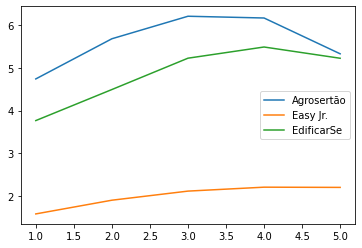

In [5]:
#Carrega as ferramentas de criação de gráficos
%matplotlib inline
from matplotlib import pyplot as plt

#Configura o eixo X do gráfico
X =[0, 1, 2, 3, 4, 5, 6]

#Mostra os sinais das 3 primeiras EJs
for sinal_de_EJ in sinais_das_EJs[:3]:
    
    #Joga o sinal no gráfico
    plt.plot(X[1:-1], sinal_de_EJ.pontos[1:-1])

#Adiciona uma legenda com os nomes das EJs do gráfico
plt.legend([sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs[:3]])

Interpretando o gráfico acima, notamos que as dores se acumulam de acordo com os clusters de maneira quase linear. Calculando a média dos sinais de todas as EJs, tem-se:

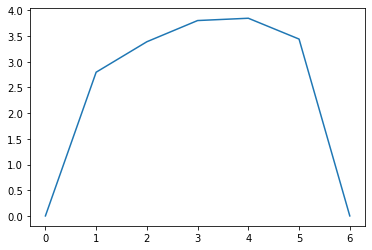

In [6]:
#Calcula a média
EJ_média = sum(sinais_das_EJs)/len(sinais_das_EJs)

#Joga no gráfico
plt.plot(X, EJ_média.pontos)

Para entender os padrões de variação dos sinais de cluster da rede sergipana de acordo com a PCA, é preciso subtrair a média de cada sinal:

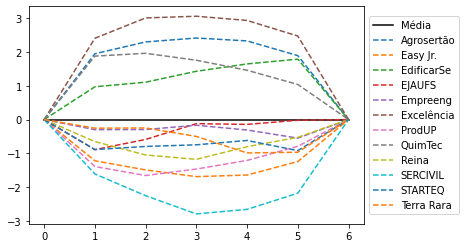

In [7]:
#Centraliza os sinais em relação à média
sinais_centrados = [EJ - EJ_média for EJ in sinais_das_EJs]

#Põe a média no gráfico em preto com traço cheio
plt.plot(X, [0] * 7, "black")

#Põe os sinais centrados no gráfico com traço vazado
for EJ in sinais_centrados:
    plt.plot(X, EJ.pontos, "--")

#Adiciona a legenda
plt.legend(["Média"] + [sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs], loc="center left", bbox_to_anchor=(1, 0.5))

Encontrar as componentes principais consiste em determinar os eixos de maior variação a partir da média. Isto é feita a partir:

1. Da determinação da matriz de covariância. É uma matriz que estabelece como as dimensões dos dados estão relacionadas entre si.

2. Do cálculo dos autovetores e autovalores. Os autovetores representam os eixos, perpendiculares entre si, onde há maior variação. Seus autovalores representam quanto os dados variam na direção correspondente. 

In [8]:
#Traz a ferramenta de cálculo de autovetores e autovalores
from numpy.linalg import eig as auto

#Cálculo da matriz de covariância
cov = covariância_EJs = [
    [sum([sinais_centrados[k][i]
          * sinais_centrados[k][j]
                     for k in range(len(EJs))]
        )/len(EJs)
        
        for j in range(5)]
        for i in range(5)]

#Retorna as variâncias (autovalores) e suas
#correspondentes direções (autovetores)
variâncias, vetores = auto(cov)

#Consegue as posições das variâncias necessárias
#para que sejam dispostas em ordem decrescente
índices = variâncias.argsort()[::-1]

#Põe as variâncias e seus respectivos vetores em ordem decrescente
variâncias = variâncias[índices]
vetores = vetores[:, índices]

#Transforma as variâncias em escalares
#(Os passos acima executados a retornam em forma de vetores)
variâncias = [float(var) for var in variâncias]

Rankeando os valores das variâncias em cada eixo, descobre-se que um dos eixos concentra a maior parte da variação:

In [9]:
#Cria o ranking mostrado abaixo
print("""
  Variância  Percentual
  
1ª: {0:.2f}  | {5:.2f}% do total
2ª:  {1:.2f}  | {6:.2f}% do total 
3ª:  {2:.2f}  | {7:.2f}% do total 
4ª:  {3:.2f}  | {8:.2f}% do total 
5ª:  {4:.3f} | {9:.2f}% do total 
""".format(*variâncias, *[100 * var/sum(variâncias) for var in variâncias])
     )


  Variância  Percentual
  
1ª: 11.79  | 97.75% do total
2ª:  0.21  | 1.74% do total 
3ª:  0.05  | 0.43% do total 
4ª:  0.01  | 0.07% do total 
5ª:  0.002 | 0.02% do total 



Utilizando somente os 2 primeiros vetores como eixos (que contém juntos 99,5% de toda a variação), chega-se a:

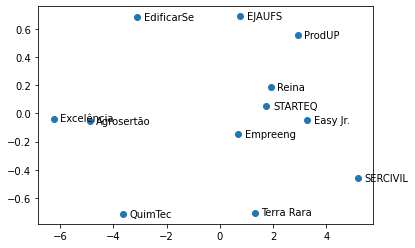

In [14]:
projeção = (vetores[:, [0, 1]].T
            @ np.hstack([sinal.T for sinal in sinais_centrados])
)

plt.scatter(projeção[0], projeção[1])

for i, sinal in enumerate(sinais_das_EJs):
    plt.annotate(sinal.name, (projeção[0][i] + 0.25, projeção[1][i] - 0.02))

Percebe-se que as EJs se dividiram naturalmente em 6 grupos distintos:

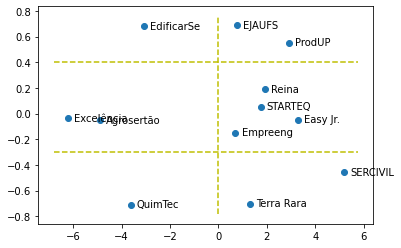

In [15]:
plt.scatter(projeção[0], projeção[1])

for i, sinal in enumerate(sinais_das_EJs):
    x, y = projeção[0][i], projeção[1][i]
    if y > 0.4:
        if x < 0: sinal.grupo = "Grupo 1"
        else:     sinal.grupo = "Grupo 2"
    elif y >-0.3:
        if x < 0: sinal.grupo = "Grupo 3"
        else:      sinal.grupo ="Grupo 4"
    else:
        if x < 0: sinal.grupo = "Grupo 5"
        else:      sinal.grupo ="Grupo 6"
            
    plt.annotate(sinal.name, (x + 0.25, y - 0.02))

y_lim_i, y_lim_s = plt.ylim()
x_lim_i, x_lim_s = plt.xlim()
    
plt.plot([x_lim_i, x_lim_s], [0.4, 0.4], "y--")
plt.plot([x_lim_i, x_lim_s], [-0.3, -0.3], "y--")
plt.plot([0, 0], [y_lim_i, y_lim_s], "y--")

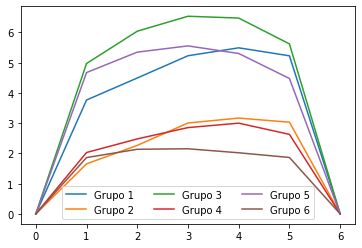

In [19]:
Média_Grupo = dict()

for i in range(1, 6 + 1):
    EJs_do_grupo = [EJ for EJ in sinais_das_EJs if EJ.grupo == "Grupo {}".format(i)]
    Média_Grupo[i] = sum(EJs_do_grupo)/len(EJs_do_grupo)
    
for i in Média_Grupo:
    plt.plot(X, Média_Grupo[i].pontos)
    
plt.legend(["Grupo {}".format(i) for i in range(1, 6 + 1)], ncol=3)

### Análise Fatorial

Esta técnica consiste em olhar para as respostas que estão mais correlacionadas e, a partir delas, inferir fatores ocultos.

In [29]:
#Importa do R os dados não processados
%R -o entrada

#Elimina a coluna com o nome das EJs
entrada.drop(columns=["EJs"], inplace=True)

#Mostra a tabela abaixo:
print(entrada)

    MN_1_1  MN_1_2  MN_2_1  MN_2_2  MN_3_1  MN_3_2  MN_4_1  MN_4_2  MN_5_1  \
1        0       2       2       3       4       4       2       4       4   
2        4       4       3       2       3       2       3       3       4   
3        1       0       1       0       2       1       2       1       1   
4        1       1       3       3       1       1       1       0       2   
5        3       0       3       0       3       1       1       2       1   
6        1       0       0       3       1       0       0       2       2   
7        1       1       1       0       1       0       2       2       2   
8        0       0       0       0       0       0       0       2       0   
9        0       0       0       0       2       1       1       2       2   
10       0       0       0       1       2       4       0       2       1   
11       3       2       2       3       4       3       3       4       3   
12       4       1       2       3       3       2       2      